#1	Load csv file in notebook using python code 


In [1]:
import pandas as pd

df = pd.read_csv('healthcare-dataset-stroke-data.csv')


#2	Explore Data using python code 


##•	Total records

In [2]:
#count of rows in df
df.shape[0]

5110

Null count

In [3]:
#count of NaN over entire dataFrame
df.isna().sum().sum()

201

•	Mean, median, std-dev for each numerical column

In [4]:
#Mean of all numerical col
for i in ["age","hypertension",'avg_glucose_level','bmi']:
    print(i+' mean->',df[i].mean())
    print(i+' median->',df[i].median())
    print(i+' std-dev->',df[i].std())
    print()

age mean-> 43.226614481409
age median-> 45.0
age std-dev-> 22.61264672311349

hypertension mean-> 0.0974559686888454
hypertension median-> 0.0
hypertension std-dev-> 0.29660667423379117

avg_glucose_level mean-> 106.1476771037182
avg_glucose_level median-> 91.88499999999999
avg_glucose_level std-dev-> 45.28356015058198

bmi mean-> 28.893236911794666
bmi median-> 28.1
bmi std-dev-> 7.854066729680164



In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#	Plot charts and explain them in words(min 2 charts)

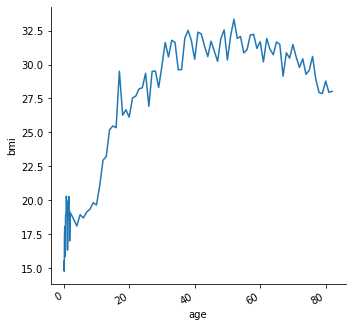

In [6]:
import seaborn as sns
#BMI oof certain age grp vs age
df1 = pd.DataFrame(dict(age=df['age'],
                       bmi=df['bmi']))
g = sns.relplot(x="age", y="bmi", kind="line", data=df1,ci=None)
g.figure.autofmt_xdate()

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

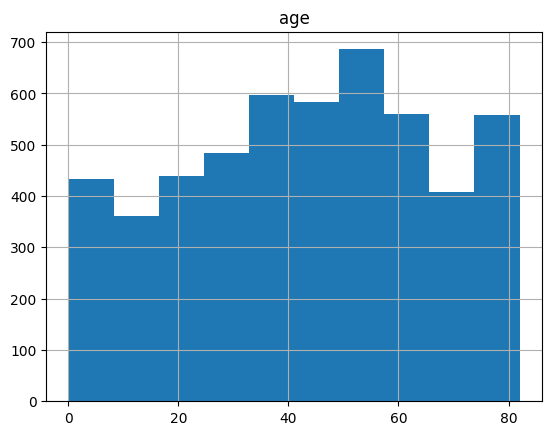

In [7]:
df.hist(column='age')

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

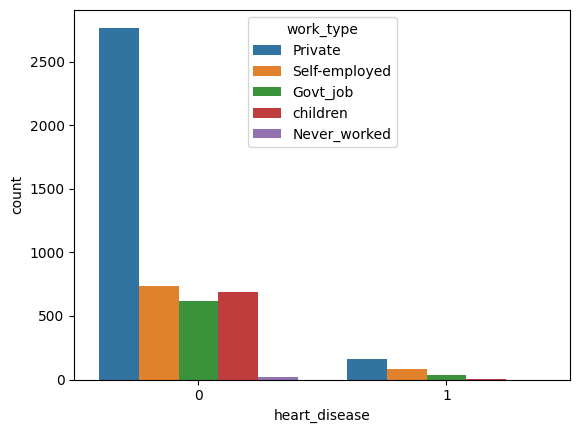

In [8]:
#identifing that private employee tend to have more heart attack than other work_type.

sns.countplot(x='heart_disease',hue='work_type' , data=df)

##	Check if “BMI” column has null values? what is the percentage of null values ? use data engineering method to fill the null values. 

In [9]:
#RETURNS true if NaN in the column
df['bmi'].isnull().values.any()

True

In [10]:
#first statment get the total  sum of NaN in bmi column
nan_val=df['bmi'].isnull().sum()
total_rows=df.shape[0]
print('percentage of NaN values in BMI -> ',(nan_val/total_rows*100))

percentage of NaN values in BMI ->  3.9334637964774952


In [11]:
df['bmi']=df['bmi'].fillna(df['bmi'].median())
df['bmi'].isnull().values.any()

False

#	Perform Scaling on all numerical columns

In [12]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
df[['avg_glucose_level','bmi']]=scalar.fit_transform(df[['avg_glucose_level','bmi']])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,0.801265,0.301260,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,0.679023,0.203895,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,0.234512,0.254296,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,0.536008,0.276060,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,0.549349,0.156930,never smoked,1


# Removing outliers using quantile

In [13]:
cols=['age','bmi']
q1=df[cols].quantile(0.25)
q2 = df[cols].quantile(0.75)
a = q2-q1
df = df[~((df[cols] < (q1 - 1.5 * a)) |(df[cols] > (q2 + 1.5 * a))).any(axis=1)]


#	Perform Encoding on all categorical columns

In [14]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

df['gender'] = LabelEncoder().fit_transform(df['gender'])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,Private,Urban,0.801265,0.301260,formerly smoked,1
1,51676,0,61.0,0,0,Yes,Self-employed,Rural,0.679023,0.203895,never smoked,1
2,31112,1,80.0,0,1,Yes,Private,Rural,0.234512,0.254296,never smoked,1
3,60182,0,49.0,0,0,Yes,Private,Urban,0.536008,0.276060,smokes,1
4,1665,0,79.0,1,0,Yes,Self-employed,Rural,0.549349,0.156930,never smoked,1


In [15]:
df['ever_married']  = LabelEncoder().fit_transform(df['ever_married'])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,Urban,0.801265,0.301260,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,Rural,0.679023,0.203895,never smoked,1
2,31112,1,80.0,0,1,1,Private,Rural,0.234512,0.254296,never smoked,1
3,60182,0,49.0,0,0,1,Private,Urban,0.536008,0.276060,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,Rural,0.549349,0.156930,never smoked,1


In [16]:
df['Residence_type']=LabelEncoder().fit_transform(df['Residence_type'])

In [17]:
import numpy as np
#applying onehot encoding 
x=pd.get_dummies(df,columns=['smoking_status','work_type'])
print(x)
df=pd.concat([df,x],axis=1)

         id  gender   age  hypertension  heart_disease  ever_married  \
0      9046       1  67.0             0              1             1   
1     51676       0  61.0             0              0             1   
2     31112       1  80.0             0              1             1   
3     60182       0  49.0             0              0             1   
4      1665       0  79.0             1              0             1   
...     ...     ...   ...           ...            ...           ...   
5105  18234       0  80.0             1              0             1   
5106  44873       0  81.0             0              0             1   
5107  19723       0  35.0             0              0             1   
5108  37544       1  51.0             0              0             1   
5109  44679       0  44.0             0              0             1   

      Residence_type  avg_glucose_level       bmi  stroke  \
0                  1           0.801265  0.301260       1   
1            

In [18]:
df.drop(['smoking_status','work_type'],axis=1)

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,...,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,1,67.0,0,1,1,1,0.801265,0.301260,1,...,1,0,1,0,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,0.679023,0.203895,1,...,1,0,0,1,0,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,0.234512,0.254296,1,...,1,0,0,1,0,0,0,1,0,0
3,60182,0,49.0,0,0,1,1,0.536008,0.276060,1,...,1,0,0,0,1,0,0,1,0,0
4,1665,0,79.0,1,0,1,0,0.549349,0.156930,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,1,0.132167,0.203895,0,...,0,0,0,1,0,0,0,1,0,0
5106,44873,0,81.0,0,0,1,1,0.323516,0.340206,0,...,0,0,0,1,0,0,0,0,1,0
5107,19723,0,35.0,0,0,1,0,0.128658,0.232532,0,...,0,0,0,1,0,0,0,0,1,0
5108,37544,1,51.0,0,0,1,0,0.513203,0.175258,0,...,0,0,1,0,0,0,0,1,0,0
